implementesi SVM unutk analisis sentimen pada data indoNLU

# Import Library

In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn import svm
from sklearn.metrics import classification_report

In [ ]:
!git clone https://github.com/indobenchmark/indonlu

# Membaca Data

In [3]:
data_train = pd.read_csv('indonlu/dataset/smsa_doc-sentiment-prosa/train_preprocess.tsv', sep='\t', names=["Teks", "Target"])
data_valid = pd.read_csv('indonlu/dataset/smsa_doc-sentiment-prosa/valid_preprocess.tsv', sep='\t', names=["Teks", "Target"])
data_train.head()

,Teks,Target
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


In [5]:
print (data_train.shape)
print (data_valid.shape)

(11000, 2)
(1260, 2)


In [6]:
data_train['Target'].value_counts()

Target
positive    6416
negative    3436
neutral     1148
Name: count, dtype: int64

visualisasi persebaran data

<Axes: xlabel='Target'>

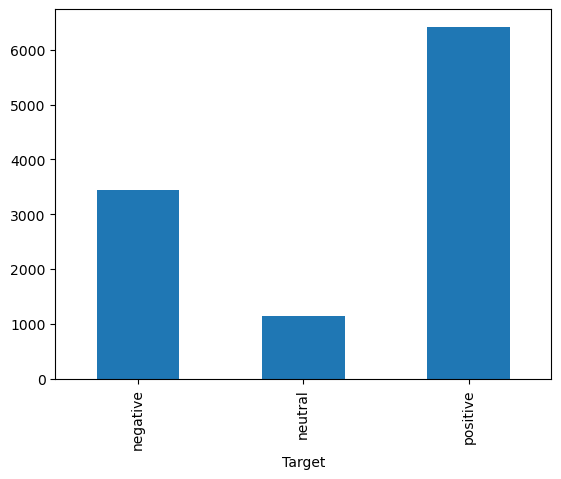

In [7]:
data_train.groupby('Target').size().plot(kind='bar')

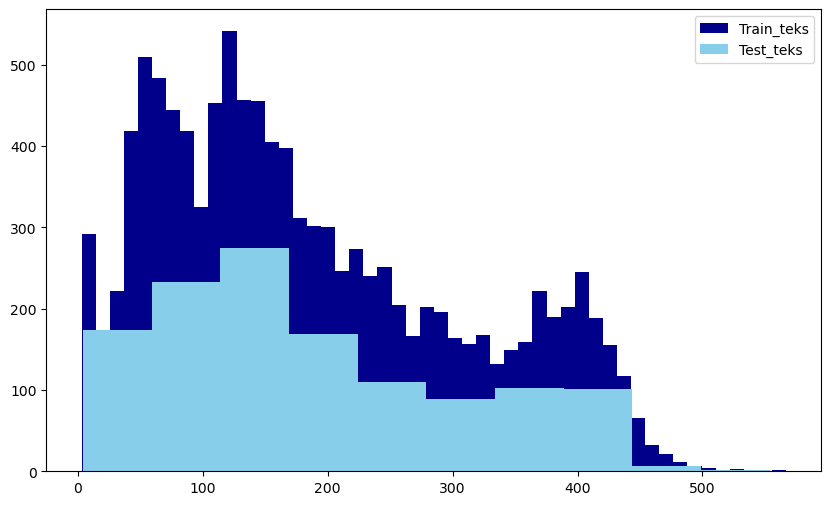

In [8]:
# Melihat panjang teks dalam data train dan data test

length_train = data_train['Teks'].str.len()
length_test = data_valid['Teks'].str.len()

plt.figure(figsize=(10, 6))
plt.hist(length_train, bins=50, label='Train_teks', color='darkblue')
plt.hist(length_test, label='Test_teks', color='skyblue')
plt.legend()

visualisasi kata yang sering muncul dalam data

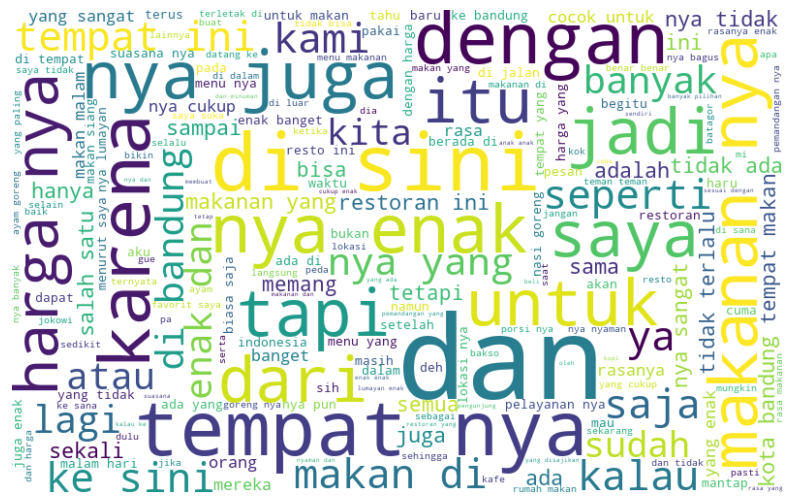

In [11]:
def wordCloud(words):
    wordCloud = WordCloud(width=800, height=500, background_color='white', random_state=21, max_font_size=120).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')

all_words = ' '.join([text for text in data_train['Teks']])
wordCloud(all_words)

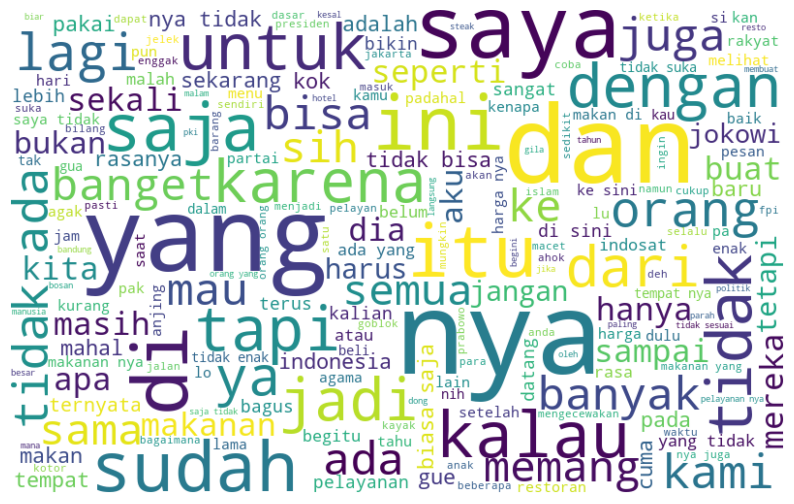

In [12]:
negative_words = ' '.join([text for text in data_train['Teks'][data_train['Target'] == 'negative']])
wordCloud(negative_words)

# Future Engineering

TF-IDF future engin